In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv("TrafficSigns.csv", sep = ",")
df.head(10)

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,283941710,WF,1010,Middle St,Pittsburgh,Metal Pole,1995-02-08,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,1858577624,WF,1107,Sherman Ave,Pittsburgh,Metal Pole,1995-03-22,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,1338013353,WF,1010,Middle St,Pittsburgh,Wood Pole,1996-05-09,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,208075892,WF,500,E North Ave,Pittsburgh,Wood Pole,1994-09-21,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,565974481,R1-1,1434,N St Clair St,Pittsburgh,Wood Pole,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [3]:
df = df.drop(labels = "id", axis = 1)
df.head(10)

,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,WF,1010,Middle St,Pittsburgh,Metal Pole,1995-02-08,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,WF,1107,Sherman Ave,Pittsburgh,Metal Pole,1995-03-22,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,WF,1010,Middle St,Pittsburgh,Wood Pole,1996-05-09,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,WF,500,E North Ave,Pittsburgh,Wood Pole,1994-09-21,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,R1-1,1434,N St Clair St,Pittsburgh,Wood Pole,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [4]:
df = df.drop(labels = "mutcd_code", axis = 1)
df.head(10)

,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,1010,Middle St,Pittsburgh,Metal Pole,1995-02-08,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,1107,Sherman Ave,Pittsburgh,Metal Pole,1995-03-22,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,1010,Middle St,Pittsburgh,Wood Pole,1996-05-09,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,500,E North Ave,Pittsburgh,Wood Pole,1994-09-21,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,1434,N St Clair St,Pittsburgh,Wood Pole,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [5]:
df = df.drop(labels = "address_number", axis = 1)
df.head(10)

,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,Middle St,Pittsburgh,Metal Pole,1995-02-08,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,Sherman Ave,Pittsburgh,Metal Pole,1995-03-22,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,Middle St,Pittsburgh,Wood Pole,1996-05-09,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,E North Ave,Pittsburgh,Wood Pole,1994-09-21,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,N St Clair St,Pittsburgh,Wood Pole,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [6]:
df = df.drop(labels = "mounting_fixture", axis = 1)
df.head(10)

,street,city,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,California Ave,Pittsburgh,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,Glenbury St,Pittsburgh,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,Forbes Ave,Pittsburgh,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,N St Clair St,Pittsburgh,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,Isabella St,Pittsburgh,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,Middle St,Pittsburgh,1995-02-08,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,Sherman Ave,Pittsburgh,1995-03-22,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,Middle St,Pittsburgh,1996-05-09,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,E North Ave,Pittsburgh,1994-09-21,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,N St Clair St,Pittsburgh,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [7]:
df = df.drop(labels = "date_installed", axis = 1)
df.head(10)

,street,city,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,California Ave,Pittsburgh,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,Glenbury St,Pittsburgh,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,Forbes Ave,Pittsburgh,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,N St Clair St,Pittsburgh,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,Isabella St,Pittsburgh,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,Middle St,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,Sherman Ave,Pittsburgh,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,Middle St,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,E North Ave,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,N St Clair St,Pittsburgh,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [8]:
df = df.drop(labels = "street", axis = 1)
df.head(10)

,city,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,Pittsburgh,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,Pittsburgh,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,Pittsburgh,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,Pittsburgh,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,Pittsburgh,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,Pittsburgh,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,Pittsburgh,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [9]:
df = df.drop(labels = "council_district", axis = 1)
df.head(10)

,city,description,neighborhood,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,Pittsburgh,Stop,California-Kirkbride,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,Pittsburgh,Stop,Overbrook,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,Pittsburgh,Stop,Squirrel Hill North,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,Pittsburgh,Stop,Highland Park,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,Pittsburgh,Wayfinding Signage,North Shore,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,Pittsburgh,Wayfinding Signage,East Allegheny,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,Pittsburgh,Wayfinding Signage,Central Northside,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,Pittsburgh,Wayfinding Signage,East Allegheny,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,Pittsburgh,Wayfinding Signage,East Allegheny,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,Pittsburgh,Stop,Highland Park,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [10]:
df = df.drop(labels = "ward", axis = 1)
df.head(10)

,city,description,neighborhood,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,Pittsburgh,Stop,California-Kirkbride,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,Pittsburgh,Stop,Overbrook,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,Pittsburgh,Stop,Squirrel Hill North,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,Pittsburgh,Stop,Highland Park,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,Pittsburgh,Wayfinding Signage,North Shore,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,Pittsburgh,Wayfinding Signage,East Allegheny,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,Pittsburgh,Wayfinding Signage,Central Northside,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,Pittsburgh,Wayfinding Signage,East Allegheny,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,Pittsburgh,Wayfinding Signage,East Allegheny,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,Pittsburgh,Stop,Highland Park,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [11]:
df = df.drop(labels = "tract", axis = 1)
df.head(10)

,city,description,neighborhood,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,Pittsburgh,Stop,California-Kirkbride,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,Pittsburgh,Stop,Overbrook,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,Pittsburgh,Stop,Squirrel Hill North,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,Pittsburgh,Stop,Highland Park,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,Pittsburgh,Wayfinding Signage,North Shore,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,Pittsburgh,Wayfinding Signage,Central Northside,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,Pittsburgh,Stop,Highland Park,2.0,11.0,5.0,3-9,40.478543,-79.919190


In [12]:
df = df.drop(labels = "public_works_division", axis = 1)
df.head(10)

,city,description,neighborhood,pli_division,police_zone,fire_zone,latitude,longitude
0,Pittsburgh,Stop,California-Kirkbride,25.0,1.0,1-9,40.459325,-80.019057
1,Pittsburgh,Stop,Overbrook,32.0,3.0,4-25,40.386955,-80.002161
2,Pittsburgh,Stop,Squirrel Hill North,14.0,4.0,2-8,40.439828,-79.934814
3,Pittsburgh,Stop,Highland Park,11.0,5.0,3-9,40.478685,-79.919270
4,Pittsburgh,Wayfinding Signage,North Shore,22.0,1.0,1-20,40.448482,-80.000671
5,Pittsburgh,Wayfinding Signage,East Allegheny,23.0,1.0,1-6,40.456659,-79.999908
6,Pittsburgh,Wayfinding Signage,Central Northside,22.0,1.0,1-21,40.454961,-80.009709
7,Pittsburgh,Wayfinding Signage,East Allegheny,23.0,1.0,1-6,40.456723,-79.999692
8,Pittsburgh,Wayfinding Signage,East Allegheny,23.0,1.0,1-6,40.456514,-80.001359
9,Pittsburgh,Stop,Highland Park,11.0,5.0,3-9,40.478543,-79.919190


In [13]:
df = df.drop(labels = "pli_division", axis = 1)
df.head(10)

,city,description,neighborhood,police_zone,fire_zone,latitude,longitude
0,Pittsburgh,Stop,California-Kirkbride,1.0,1-9,40.459325,-80.019057
1,Pittsburgh,Stop,Overbrook,3.0,4-25,40.386955,-80.002161
2,Pittsburgh,Stop,Squirrel Hill North,4.0,2-8,40.439828,-79.934814
3,Pittsburgh,Stop,Highland Park,5.0,3-9,40.478685,-79.919270
4,Pittsburgh,Wayfinding Signage,North Shore,1.0,1-20,40.448482,-80.000671
5,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,1-6,40.456659,-79.999908
6,Pittsburgh,Wayfinding Signage,Central Northside,1.0,1-21,40.454961,-80.009709
7,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,1-6,40.456723,-79.999692
8,Pittsburgh,Wayfinding Signage,East Allegheny,1.0,1-6,40.456514,-80.001359
9,Pittsburgh,Stop,Highland Park,5.0,3-9,40.478543,-79.919190


In [14]:
df = df.drop(labels = "police_zone", axis = 1)
df.head(10)

,city,description,neighborhood,fire_zone,latitude,longitude
0,Pittsburgh,Stop,California-Kirkbride,1-9,40.459325,-80.019057
1,Pittsburgh,Stop,Overbrook,4-25,40.386955,-80.002161
2,Pittsburgh,Stop,Squirrel Hill North,2-8,40.439828,-79.934814
3,Pittsburgh,Stop,Highland Park,3-9,40.478685,-79.919270
4,Pittsburgh,Wayfinding Signage,North Shore,1-20,40.448482,-80.000671
5,Pittsburgh,Wayfinding Signage,East Allegheny,1-6,40.456659,-79.999908
6,Pittsburgh,Wayfinding Signage,Central Northside,1-21,40.454961,-80.009709
7,Pittsburgh,Wayfinding Signage,East Allegheny,1-6,40.456723,-79.999692
8,Pittsburgh,Wayfinding Signage,East Allegheny,1-6,40.456514,-80.001359
9,Pittsburgh,Stop,Highland Park,3-9,40.478543,-79.919190


In [15]:
df = df.drop(labels = "fire_zone", axis = 1)
df.head(10)

,city,description,neighborhood,latitude,longitude
0,Pittsburgh,Stop,California-Kirkbride,40.459325,-80.019057
1,Pittsburgh,Stop,Overbrook,40.386955,-80.002161
2,Pittsburgh,Stop,Squirrel Hill North,40.439828,-79.934814
3,Pittsburgh,Stop,Highland Park,40.478685,-79.919270
4,Pittsburgh,Wayfinding Signage,North Shore,40.448482,-80.000671
5,Pittsburgh,Wayfinding Signage,East Allegheny,40.456659,-79.999908
6,Pittsburgh,Wayfinding Signage,Central Northside,40.454961,-80.009709
7,Pittsburgh,Wayfinding Signage,East Allegheny,40.456723,-79.999692
8,Pittsburgh,Wayfinding Signage,East Allegheny,40.456514,-80.001359
9,Pittsburgh,Stop,Highland Park,40.478543,-79.919190


In [16]:
df = df.drop(labels = "latitude", axis = 1)
df.head(10)

,city,description,neighborhood,longitude
0,Pittsburgh,Stop,California-Kirkbride,-80.019057
1,Pittsburgh,Stop,Overbrook,-80.002161
2,Pittsburgh,Stop,Squirrel Hill North,-79.934814
3,Pittsburgh,Stop,Highland Park,-79.919270
4,Pittsburgh,Wayfinding Signage,North Shore,-80.000671
5,Pittsburgh,Wayfinding Signage,East Allegheny,-79.999908
6,Pittsburgh,Wayfinding Signage,Central Northside,-80.009709
7,Pittsburgh,Wayfinding Signage,East Allegheny,-79.999692
8,Pittsburgh,Wayfinding Signage,East Allegheny,-80.001359
9,Pittsburgh,Stop,Highland Park,-79.919190


In [17]:
df = df.drop(labels = "longitude", axis = 1)
df.head(10)

,city,description,neighborhood
0,Pittsburgh,Stop,California-Kirkbride
1,Pittsburgh,Stop,Overbrook
2,Pittsburgh,Stop,Squirrel Hill North
3,Pittsburgh,Stop,Highland Park
4,Pittsburgh,Wayfinding Signage,North Shore
5,Pittsburgh,Wayfinding Signage,East Allegheny
6,Pittsburgh,Wayfinding Signage,Central Northside
7,Pittsburgh,Wayfinding Signage,East Allegheny
8,Pittsburgh,Wayfinding Signage,East Allegheny
9,Pittsburgh,Stop,Highland Park


In [18]:
sorted_df = df.sort_values("description")
sorted_df.dropna()

,city,description,neighborhood
66236,Pittsburgh,1 Hour Parking,Upper Lawrenceville
57103,Pittsburgh,1 Hour Parking,Carrick
66537,Pittsburgh,1 Hour Parking,Friendship
56765,Pittsburgh,1 Hour Parking,Allegheny West
73576,Pittsburgh,1 Hour Parking,Allentown
...,...,...,...
46141,Pittsburgh,Yield to Peds in Crosswalk,Sheraden
49927,Pittsburgh,Yield to Peds in Crosswalk,Squirrel Hill South
32312,Pittsburgh,Yield to Peds in Crosswalk,Marshall-Shadeland
51841,Pittsburgh,Yield to Peds in Crosswalk,Squirrel Hill South


In [19]:
num_stop = df['description'] == "Stop"
x = df[num_stop]
x.head(74105)

,city,description,neighborhood
0,Pittsburgh,Stop,California-Kirkbride
1,Pittsburgh,Stop,Overbrook
2,Pittsburgh,Stop,Squirrel Hill North
3,Pittsburgh,Stop,Highland Park
9,Pittsburgh,Stop,Highland Park
...,...,...,...
74404,Pittsburgh,Stop,Mount Washington
74612,Pittsburgh,Stop,Crawford-Roberts
74615,Pittsburgh,Stop,Upper Hill
74616,Pittsburgh,Stop,Upper Hill


Sorting the description of traffic signs into stop signs because the more stop signs there are, it is likely that there are more
traffic lights in the correpsponding neighborhood. I put head(74105) for the reason that there are 74105 rows in total from the 
code above.

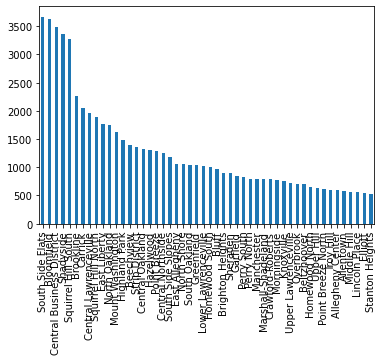

In [23]:
df['neighborhood'].value_counts(ascending=False).head(50).plot(kind = 'bar')

Here's a bar graph that represents the number of stop signs in different areas of Pittsburgh city.
Let's make it easier to determine the neighborhoods that have the most stop signs.

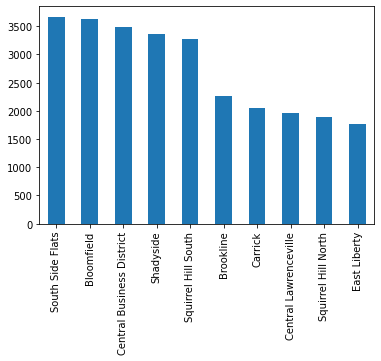

In [24]:
df['neighborhood'].value_counts(ascending = False).head(10).plot(kind = 'bar')

Based on the fact that the more stop signs there are, the more traffic lights will also be built to keep the 
traffic moving. Conclusively, South Side Flats, Bloomfield, Central Business District, Shadyside and Squirrel Hill South are the
neighborhoods that have the largest number of traffic light meaning that these are the most traffic-heavy and prosperous
neighborhoods.